# **Analisi dei disastri aerei dal 1919 al 2023**

Il presente notebook raccoglie i risultati dell'analisi effettuata su richiesta della IASS (International Alliance for Safe Skies). L'analisi ha riguardato i disastri aerei dal 1919 al 2023 ed è stata effettuata sulla base di dati forniti dalla stessa associazione che ha richiesto il progetto.

La prima sezione è dedicata all'importazione e alla preparazione dei dati e all'individuazione di quei record che presentano valori incompleti.


    date: data dell'incidente
    type: tipo del velivolo
    registration: codice di registrazione del velivolo
    operator: operatore del velivolo
    fatalities: numero di morti
    location: luogo dell'incidente
    country: nazione dell'incidente
    cat: categoria dell'incidente come descritto dal ASN


## **Importazione e preparazione dei dati**

In [ ]:
import pandas as pd

df=pd.read_csv("https://proai-datasets.s3.eu-west-3.amazonaws.com/aviation-accidents.csv")
df

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


Nel corso dell'esplorazione di questa colonna(fatalites) sono emersi due fattori:

    La presenza di valori vuoti;
    La presenza di alcuni valori riportati come somma.

Entrambi i fattori sono verificabili dalla cella seguente, dove sono stati estratti i valori unici della colonna fatalities.

In [ ]:
#  valori unici nella colonna fatalities

df['fatalities'].unique()

array([nan, '0', '14', '1', '4', '2', '5', '6', '3', '7', '5+ 1', '8',
       '16', '12', '9', '15', '14+ 1', '10', '11', '35+ 9', '13', '2+ 2',
       '17', '19', '20', '0+ 1', '18', '13+ 1', '25', '29', '23', '5+ 7',
       '24', '36', '26', '22', '27', '12+ 1', '21', '7+ 6', '35', '32',
       '31', '2+ 1', '34', '28', '20+ 5', '0+ 2', '30', '41', '59',
       '13+ 7', '45', '44', '37', '3+ 5', '4+ 6', '30+ 1', '19+ 1', '39',
       '11+ 1', '43', '53', '0+ 3', '50', '14+ 3', '3+ 1', '52', '8+ 1',
       '5+ 3', '40', '0+ 6', '8+ 2', '33', '48', '55', '1+ 1', '38',
       '0+ 7', '32+ 1', '13+ 2', '80', '1+ 2', '46', '58', '51', '10+ 3',
       '56', '23+ 7', '29+ 4', '2+ 3', '5+ 2', '87', '129', '42', '5+ 10',
       '35+ 1', '47', '66', '1+ 4', '5+ 4', '74', '70', '62', '17+ 1',
       '4+ 3', '18+ 2', '20+ 2', '67', '79', '5+ 6', '6+ 1', '61',
       '41+ 1', '21+ 2', '99', '64', '3+ 4', '65', '1+ 9', '68', '54',
       '3+ 8', '32+ 10', '6+ 2', '63', '7+ 1', '84+ 6', '20+ 32', '

Per quanto riguarda i nan , ci si è appoggiati alla convenzione legale per cui un numero sconosciuto di vittime equivale a nessuna vittima, ragion per cui i valori mancanti sono stati sostituiti con 0.

In [ ]:
# sostituire i valori nan nella colonna fatalities con 0

df['fatalities'] = df['fatalities'].fillna(0)
df

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,0,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,0,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,0,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,0,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


Per quanto riguarda i valori riportati come somma, si è concluso che facessero una distinzione tra le vittime tra i passeggeri e quelle tra il personale di terra. Per unire questi due valori, si è deciso di separarli in due colonne e sostituire fatalities con la loro somma.

In [ ]:
df[["fatal_passengers","fatal_civilians"]]=df["fatalities"].str.split("+",expand=True).fillna("0").astype(int)
df["fatalities"]=df["fatal_passengers"]+df["fatal_civilians"]
df.drop(columns=["fatal_passengers","fatal_civilians"],inplace=True)
df

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,0,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,0,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,0,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,0,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [ ]:
# valori unici in location

df['location'].unique()


array([nan, 'Tiksi Airport (IKS)', 'Massawa Airport ...', ...,
       'Fentheik Airstrip', 'Kampala-Kajjansi...', 'Hohn Air Base'],
      dtype=object)

In [ ]:
# rimuviamo le colonne inutili ( registration , year)

 #df.drop(columns=["registration","year","location"],inplace=True)
df.drop(columns=["location","year","registration"],inplace=True)
df

,date,type,operator,fatalities,country,cat
0,date unk.,Antonov An-12B,Indonesian AF,0,Unknown country,U1
1,date unk.,Antonov An-12B,Indonesian AF,0,Unknown country,U1
2,date unk.,Antonov An-12B,Indonesian AF,0,Unknown country,U1
3,date unk.,Antonov An-12BK,Soviet AF,0,Russia,A1
4,date unk.,Antonov An-12BP,Soviet AF,0,Eritrea,A1
...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,Angkasa Super Services,0,Indonesia,A2
23963,11-MAY-2023,Cessna 208B Grand Caravan,Nasional Global Aviasi,0,Indonesia,A2
23964,12-MAY-2023,Cessna 208B Grand Caravan,Bar Aviation,0,Uganda,A1
23965,14-MAY-2023,Boeing 747-4R7F,Cargolux,0,Luxembourg,A2


In [ ]:
# Verifichiamo la presenza di valori nulli per ogni colonna
print(df.isnull().sum())

date          0
type          0
operator      4
fatalities    0
country       0
cat           0
dtype: int64


In [ ]:
# esploriamo colonna operator

# Analisi della colonna operator

# Estraiamo i valori unici della colonna 'operator'
unique_operators = df['operator'].unique()

# Stampiamo il numero di operatori unici
print(f"Numero di operatori unici: {len(unique_operators)}")

# Stampiamo i primi 10 operatori unici per avere un'idea dei dati
print("Primi 10 operatori unici:")
print(unique_operators[:10])

# Contiamo la frequenza di ciascun operatore
operator_counts = df['operator'].value_counts()

# Stampiamo gli operatori più frequenti (ad esempio, i primi 20)
print("\nOperatori più frequenti (Top 20):")
print(operator_counts.head(20))

# Verifichiamo la presenza di valori mancanti nella colonna 'operator'
print(f"\nValori mancanti nella colonna 'operator': {df['operator'].isnull().sum()}")

# Esploriamo i record con valori mancanti nella colonna 'operator'
if df['operator'].isnull().sum() > 0:
  print("\nEsempi di record con valori mancanti nella colonna 'operator':")
  print(df[df['operator'].isnull()].head())

# Potrebbe essere utile esplorare gli operatori che appaiono solo una volta
single_occurrence_operators = operator_counts[operator_counts == 1]
print(f"\nNumero di operatori che appaiono solo una volta: {len(single_occurrence_operators)}")
# print("\nOperatori che appaiono solo una volta (Primi 10):")
# print(single_occurrence_operators.head(10))

Numero di operatori unici: 6018
Primi 10 operatori unici:
['Indonesian AF' 'Soviet AF' 'GUSMP, Directorate of Polar Aviation'
 'Aeroflot' 'Russian AF' 'Sin Sad Airlines' 'PZL-Mielec'
 'Privredna Avijacija Osijek' 'Aeroflot, Azerbaijan' 'Indian AF']

Operatori più frequenti (Top 20):
operator
USAAF                2604
USAF                 1120
RAF                   920
US Navy               745
German AF             517
private               299
Aeroflot              198
Unknown               185
Soviet AF             142
Air France            138
RAAF                  130
American Airlines     116
French AF             113
Indian Airlines       109
Spanish AF            108
Eastern Air Lines     105
TWA                   105
RCAF                  104
Brazilian AF          103
United Airlines       100
Name: count, dtype: int64

Valori mancanti nella colonna 'operator': 4

Esempi di record con valori mancanti nella colonna 'operator':
              date                type operator  fat

In [ ]:
# esploriamo la colonna type

# Analisi della colonna type

# Estraiamo i valori unici della colonna 'type'
unique_types = df['type'].unique()

# Stampiamo il numero di tipi di velivolo unici
print(f"Numero di tipi di velivolo unici: {len(unique_types)}")

# Stampiamo i primi 10 tipi di velivolo unici per avere un'idea dei dati
print("Primi 10 tipi di velivolo unici:")
print(unique_types[:10])

# Contiamo la frequenza di ciascun tipo di velivolo
type_counts = df['type'].value_counts()

# Stampiamo i tipi di velivolo più frequenti (ad esempio, i primi 20)
print("\nTipi di velivolo più frequenti (Top 20):")
print(type_counts.head(20))

# Verifichiamo la presenza di valori mancanti nella colonna 'type'
print(f"\nValori mancanti nella colonna 'type': {df['type'].isnull().sum()}")

# Esploriamo i record con valori mancanti nella colonna 'type'
if df['type'].isnull().sum() > 0:
  print("\nEsempi di record con valori mancanti nella colonna 'type':")
  print(df[df['type'].isnull()].head())

# Potrebbe essere utile esplorare i tipi di velivolo che appaiono solo una volta
single_occurrence_types = type_counts[type_counts == 1]
print(f"\nNumero di tipi di velivolo che appaiono solo una volta: {len(single_occurrence_types)}")

Numero di tipi di velivolo unici: 3201
Primi 10 tipi di velivolo unici:
['Antonov An-12B' 'Antonov An-12BK' 'Antonov An-12BP' 'Antonov An-2'
 'Antonov An-24B' 'Antonov An-26' 'Antonov An-2R' 'Antonov An-2T'
 'Antonov An-32' 'Antonov An-32A']

Tipi di velivolo più frequenti (Top 20):
type
Douglas C-47A (DC-3)            1916
Douglas C-47 (DC-3)              669
Douglas C-47B (DC-3)             592
Curtiss C-46A                    564
Junkers Ju-52/3m                 471
Antonov An-2R                    391
Curtiss C-46D                    344
Douglas Dakota III (DC-3)        262
DHC-6 Twin Otter 300             258
Cessna 208B Grand Caravan        247
Consolidated PBY-5A Catalina     215
Douglas Dakota IV (DC-3)         203
Antonov An-2                     185
Consolidated PBY-5 Catalina      179
Lisunov Li-2                     161
Beech 200 Super King Air         157
Antonov An-26                    137
Lockheed 18 Lodestar             129
Douglas DC-3                     126
Boeing 7

In [ ]:
# unknown nella colonna type

# Esploriamo i valori che contengono "unknown" nella colonna 'type'
unknown_types = df[df['type'].str.contains("unknown", na=False)]

print("\nEsempi di record con 'unknown' nella colonna 'type':")
print(unknown_types.head())

print(f"\nNumero di record con 'unknown' nella colonna 'type': {len(unknown_types)}")



Esempi di record con 'unknown' nella colonna 'type':
             date     type operator  fatalities  country cat
5446  20-SEP-1946  unknown     CNAC          31    China  A1
5655  25-APR-1947  unknown     CNAC           3    China  A1
6178  30-JAN-1949  unknown     CNAC           0   Taiwan  H2
6537  11-AUG-1950  unknown      CSA           0  Germany  H2
7036  18-APR-1952  unknown      JAT           0  Austria  H2

Numero di record con 'unknown' nella colonna 'type': 35




I valori vuoti sono presenti nella sola colonna operator, che riporta l'operatore di linea aerea del velivolo. Esplorando operator e type, è emerso inoltre che i velivoli sconosciuti sono indicati con la dicitura "unknown".

I valori mancanti e sconosciuti sono stati inclusi nella maschera mask_plane


In [ ]:
mask_plane=(df["type"].str.lower().str.contains("unknown"))|(df["operator"].str.lower().str.contains("unknown"))|df["operator"].isna()

Questa maschera (mask_plane) identifica tutte le righe in cui:

    il tipo di velivolo (type) è indicato come "unknown"

    l'operatore (operator) è "unknown"

    oppure il campo operator è vuoto (NaN)

In [ ]:
# valori unici in date

df['date'].unique()


array(['date unk.', '02-AUG-1919', '11-AUG-1919', ..., '12-MAY-2023',
       '14-MAY-2023', '15-MAY-2023'], dtype=object)

In [ ]:
# estriamo giorno mese e anno da date creando tre colonne

df[["day","month","year"]]=df["date"].str.split("-",expand=True)
df

,date,type,operator,fatalities,country,cat,day,month,year
0,date unk.,Antonov An-12B,Indonesian AF,0,Unknown country,U1,date unk.,None,None
1,date unk.,Antonov An-12B,Indonesian AF,0,Unknown country,U1,date unk.,None,None
2,date unk.,Antonov An-12B,Indonesian AF,0,Unknown country,U1,date unk.,None,None
3,date unk.,Antonov An-12BK,Soviet AF,0,Russia,A1,date unk.,None,None
4,date unk.,Antonov An-12BP,Soviet AF,0,Eritrea,A1,date unk.,None,None
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,Angkasa Super Services,0,Indonesia,A2,11,MAY,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,Nasional Global Aviasi,0,Indonesia,A2,11,MAY,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,Bar Aviation,0,Uganda,A1,12,MAY,2023
23965,14-MAY-2023,Boeing 747-4R7F,Cargolux,0,Luxembourg,A2,14,MAY,2023


In [ ]:
df["year"].unique()

array([None, '1919', '1920', '1921', '1922', '1923', '1924', '1925',
       '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933',
       '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941',
       '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949',
       '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957',
       '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023'], dtype=object)

In [ ]:
df["day"].unique()

array(['date unk.', '02', '11', '23', '25', '30', '14', '15', '04', '26',
       '27', '22', '31', '07', '13', '10', '03', '??', '06', '24', '16',
       '18', '21', '20', '05', '19', '12', '01', '17', '29', '08', '09',
       '28'], dtype=object)

In [ ]:
df["month"].unique()

array([None, 'AUG', 'FEB', 'JUN', 'DEC', 'JAN', 'MAR', 'SEP', 'APR',
       'MAY', 'JUL', '???', 'OCT', 'NOV', '14'], dtype=object)



Notiamo che alcuni valori riportano una data parziale dove il carattere '?' è usato come placeholder per giorni e mesi sconosciuti, compare anche il '14'  nell'elenco dei mesi.

Nella cella seguente è stata creata una maschera booleana chiamata mask_date che include gli errori e i valori parziali della colonna date.


In [ ]:
mask_date=(df["date"]=="date unk.")|(df["day"]=="??")|(df["month"]=="???")|(df["month"]=="14")

In [ ]:
# valori unici in country

df['country'].unique()

array(['Unknown country', 'Russia', 'Eritrea', 'Libya', 'Poland', '?',
       'India', 'Bulgaria', 'Bahamas', 'Zimbabwe', 'Mauritania', 'Cyprus',
       'Mexico', 'New Caledonia', 'Honduras', 'Peru', 'Kenya',
       'Antarctica', 'Latvia', 'Yemen', 'Ukraine', 'France', 'Liberia',
       'Italy', 'U.K.', 'South Africa', 'Sudan', 'Sweden', 'Cuba',
       'Belgium', 'China', 'Atlantic Ocean', 'Netherlands', 'Germany',
       'USA', 'Iran', 'Chile', 'Israel', 'Argentina', 'P.N. Guinea',
       'Nicaragua', 'Czech Rep.', 'Dominican Rep.', 'Brazil',
       'Mediterranean Sea', 'Indonesia', 'Egypt', 'Bolivia', 'Spain',
       'Australia', 'Iraq', 'Guatemala', 'Malta', 'Colombia',
       'Switzerland', 'Austria', 'Uganda', 'Trinidad & Tobago', 'Norway',
       'Greece', 'Algeria', 'Pakistan', 'Panama', 'Romania', 'Morocco',
       'Pacific Ocean', 'Hungary', 'Jamaica', 'Japan', 'Canada', 'Gambia',
       'Thailand', 'Philippines', 'Ecuador', 'Puerto Rico', 'Venezuela',
       'Mozambique', 'Si

In [ ]:
# maschera per i valori ? e Unknown country presenti nella colonna country

mask_country = (df['country'].str.contains(r'\?', na=False)) | (df['country'] == 'Unknown country')

In [ ]:
# utilizziamo tutte le maschere fatte fino ad ora per creare un df con tutti i dati mancanti

# Combiniamo tutte le maschere per identificare i record con dati mancanti o incompleti
mask_missing_data = mask_plane | mask_date | mask_country

# Creiamo un nuovo DataFrame contenente solo i record identificati dalla maschera
df_missing = df[mask_missing_data].copy()

# Visualizziamo il nuovo DataFrame con i dati mancanti
print("DataFrame con tutti i dati mancanti o incompleti:")
print(df_missing)


DataFrame con tutti i dati mancanti o incompleti:
              date                       type       operator  fatalities  \
0        date unk.             Antonov An-12B  Indonesian AF           0   
1        date unk.             Antonov An-12B  Indonesian AF           0   
2        date unk.             Antonov An-12B  Indonesian AF           0   
3        date unk.            Antonov An-12BK      Soviet AF           0   
4        date unk.            Antonov An-12BP      Soviet AF           0   
...            ...                        ...            ...         ...   
23812  28-MAY-2022        Beech B200 King Air        Unknown           0   
23831  ??-JUN-2022              Antonov An-2R    Voskhod LLC           0   
23853  31-AUG-2022         Cessna 208 Caravan            NaN           0   
23918  27-JAN-2023            Ilyushin Il-18D            NaN           0   
23920  02-FEB-2023  Cessna 208B Grand Caravan        Unknown           1   

               country cat        day

In [ ]:
# Calcoliamo la percentuale di dati parziali (rappresentati da `df_missing`) rispetto al dataset completo (`df`)
percentuale_dati_parziali = (len(df_missing) / len(df)) * 100

print(f"\nI dati parziali influenzano il dataset completo nella percentuale del: {percentuale_dati_parziali:.2f}%")


I dati parziali influenzano il dataset completo nella percentuale del: 6.22%


Dal momento che si tratta comunque di una piccola quantità di dati, si è deciso di rimuovere questo dataset dall'insieme originale e di mantenere i soli record che presentano dati completi.

In [ ]:
# Applichiamo la maschera inversa per ottenere il DataFrame con i dati completi
df_complete = df[~mask_missing_data].copy()

# Visualizziamo il nuovo DataFrame con i dati completi
print("\nDataFrame con dati completi:")
print(df_complete.head())

# Verifichiamo che il numero di righe nel dataframe completo sia quello atteso
print(f"\nNumero totale di record: {len(df)}")
print(f"Numero di record con dati mancanti o incompleti: {len(df_missing)}")
print(f"Numero di record con dati completi: {len(df_complete)}")
print(f"Somma record mancanti/completi vs totale: {len(df_missing) + len(df_complete) == len(df)}")
df_complete


DataFrame con dati completi:
           date                type                operator  fatalities  \
61  02-AUG-1919       Caproni Ca.48                 Caproni          14   
62  11-AUG-1919     Felixstowe Fury                     RAF           1   
63  23-FEB-1920    Handley Page O/7  Handley Page Transport           0   
64  25-FEB-1920  Handley Page O/400  Handley Page Transport           0   
65  30-JUN-1920  Handley Page O/400  Handley Page Transport           0   

         country cat day month  year  
61         Italy  A1  02   AUG  1919  
62          U.K.  A1  11   AUG  1919  
63  South Africa  A1  23   FEB  1920  
64         Sudan  A1  25   FEB  1920  
65        Sweden  A1  30   JUN  1920  

Numero totale di record: 23967
Numero di record con dati mancanti o incompleti: 1491
Numero di record con dati completi: 22476
Somma record mancanti/completi vs totale: True


,date,type,operator,fatalities,country,cat,day,month,year
61,02-AUG-1919,Caproni Ca.48,Caproni,14,Italy,A1,02,AUG,1919
62,11-AUG-1919,Felixstowe Fury,RAF,1,U.K.,A1,11,AUG,1919
63,23-FEB-1920,Handley Page O/7,Handley Page Transport,0,South Africa,A1,23,FEB,1920
64,25-FEB-1920,Handley Page O/400,Handley Page Transport,0,Sudan,A1,25,FEB,1920
65,30-JUN-1920,Handley Page O/400,Handley Page Transport,0,Sweden,A1,30,JUN,1920
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,Angkasa Super Services,0,Indonesia,A2,11,MAY,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,Nasional Global Aviasi,0,Indonesia,A2,11,MAY,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,Bar Aviation,0,Uganda,A1,12,MAY,2023
23965,14-MAY-2023,Boeing 747-4R7F,Cargolux,0,Luxembourg,A2,14,MAY,2023


In [ ]:
# metodo alternativo df = df[~(mask_date | mask_plane | mask_country)].reset_index(drop=True)
# mask → individua righe da escludere
# ~mask → individua righe da mantenere

## ***Insights***

**In quale nazione si sono verificati più incidenti?**

Top 10 nazioni con più incidenti aerei:
country
USA         4338
Russia      1358
U.K.         834
Canada       820
India        693
Brazil       606
France       539
China        503
Germany      498
Colombia     436
Name: count, dtype: int64


<ipython-input-82-14343527b7eb>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




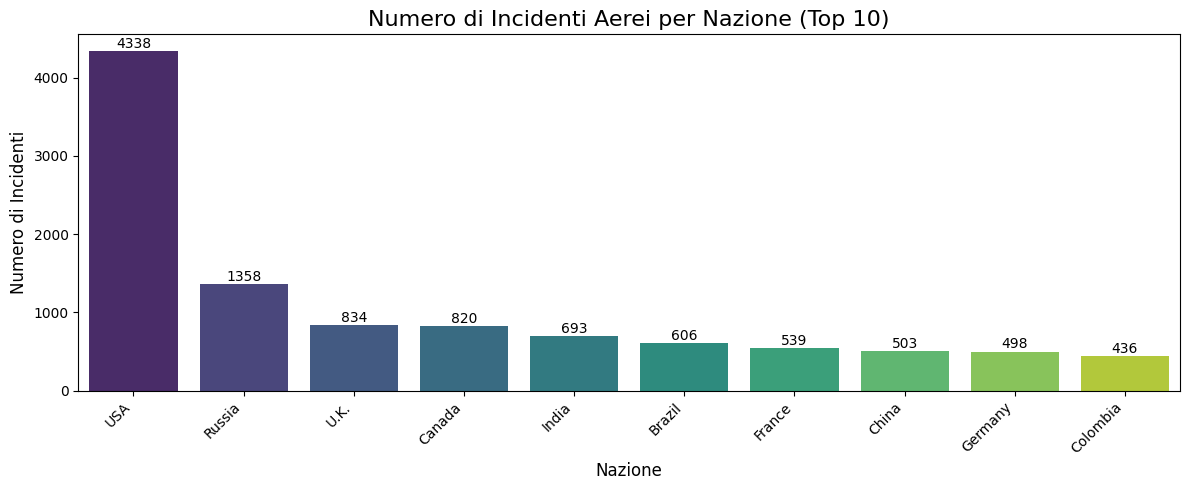

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contiamo il numero di incidenti per ogni nazione nel DataFrame con dati completi
country_accident_counts = df_complete['country'].value_counts()

# Selezioniamo le prime N nazioni con più incidenti per una migliore visualizzazione
# Possiamo scegliere N in base alla distribuzione o semplicemente prendere un numero fisso
top_n = 10
top_countries = country_accident_counts.head(top_n)

print(f"Top {top_n} nazioni con più incidenti aerei:")
print(top_countries)

# Creiamo il grafico a barre
plt.figure(figsize=(12, 5)) # Regola le dimensioni del grafico
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')

# Aggiungiamo titolo e etichette agli assi
plt.title(f'Numero di Incidenti Aerei per Nazione (Top {top_n})', fontsize=16)
plt.xlabel('Nazione', fontsize=12)
plt.ylabel('Numero di Incidenti', fontsize=12)

# Ruotiamo le etichette dell'asse x per evitare sovrapposizioni se i nomi delle nazioni sono lunghi
plt.xticks(rotation=45, ha='right')

# Aggiungiamo i valori sopra le barre per maggiore chiarezza
for i, count in enumerate(top_countries.values):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

# Assicuriamo che il layout sia pulito
plt.tight_layout()

# Mostriamo il grafico
plt.show()

**Gli incidenti avvengono più di frequente durante determinati giorni della settimana?**

<ipython-input-83-525baa1336b0>:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Numero di incidenti per giorno della settimana:
day_of_week
Monday       3175
Tuesday      3307
Wednesday    3354
Thursday     3373
Friday       3551
Saturday     3066
Sunday       2650
Name: count, dtype: int64


<ipython-input-83-525baa1336b0>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




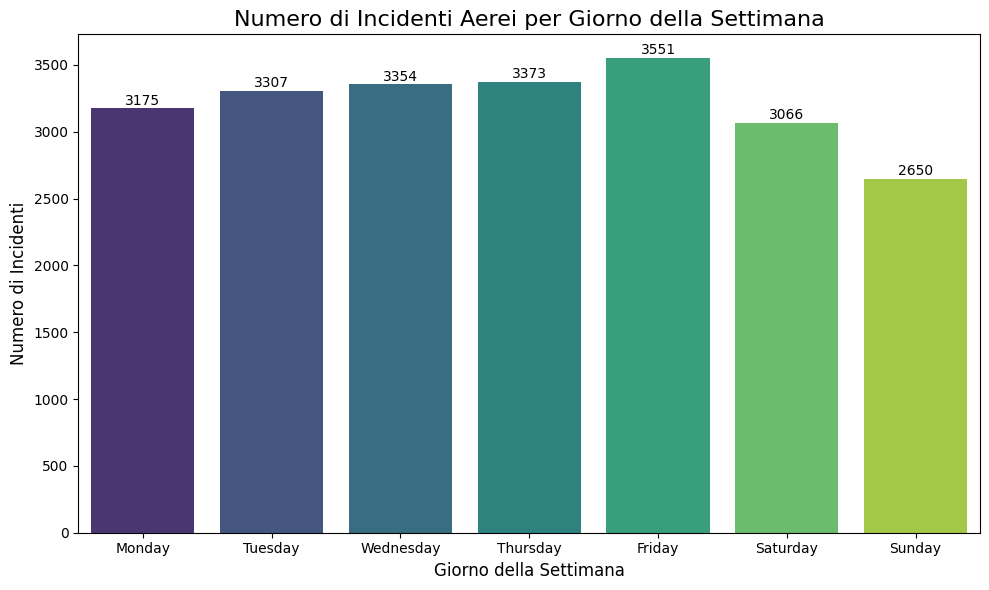

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
# Converti la colonna 'date' in formato datetime
df_complete['date'] = pd.to_datetime(df_complete['date'], errors='coerce')

# Estrae il giorno della settimana dal campo 'date'
# dt.day_name() restituisce il nome del giorno della settimana in inglese per default
df_complete['day_of_week'] = df_complete['date'].dt.day_name()

# Ordina i giorni della settimana in un ordine logico (Lunedì, Martedì, ...)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_complete['day_of_week'] = pd.Categorical(df_complete['day_of_week'], categories=days_order, ordered=True)

# Conta gli incidenti per ogni giorno della settimana
accidents_by_day = df_complete['day_of_week'].value_counts().sort_index()

print("Numero di incidenti per giorno della settimana:")
print(accidents_by_day)

# Crea il grafico a barre
plt.figure(figsize=(10, 6)) # Regola le dimensioni del grafico
sns.barplot(x=accidents_by_day.index, y=accidents_by_day.values, palette='viridis')

# Aggiunta titolo e etichette agli assi
plt.title('Numero di Incidenti Aerei per Giorno della Settimana', fontsize=16)
plt.xlabel('Giorno della Settimana', fontsize=12)
plt.ylabel('Numero di Incidenti', fontsize=12)

# Ruota le etichette dell'asse x se necessario
plt.xticks(rotation=0)

# Aggiungere i valori sopra le barre per maggiore chiarezza
for i, count in enumerate(accidents_by_day.values):
    plt.text(i, count + 5, str(count), ha='center', va='bottom') # Aggiungi 5 per posizionare il testo leggermente sopra la barra


#  layout sia pulito
plt.tight_layout()

# Mostra il grafico
plt.show()


**Quale tipo di velivolo ha causato più morti?**

Top 10 tipi di velivolo con il maggior numero di vittime:
type
Douglas C-47A (DC-3)        5770
Douglas C-47 (DC-3)         2627
Douglas C-47B (DC-3)        1992
Boeing 767-223ER            1692
Tupolev Tu-154M             1600
DC-9-32                     1441
Ilyushin Il-18V             1356
Lockheed C-130H Hercules    1271
Antonov An-26               1245
Junkers Ju-52/3m            1098
Name: fatalities, dtype: int64


<ipython-input-84-37426139cb5b>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




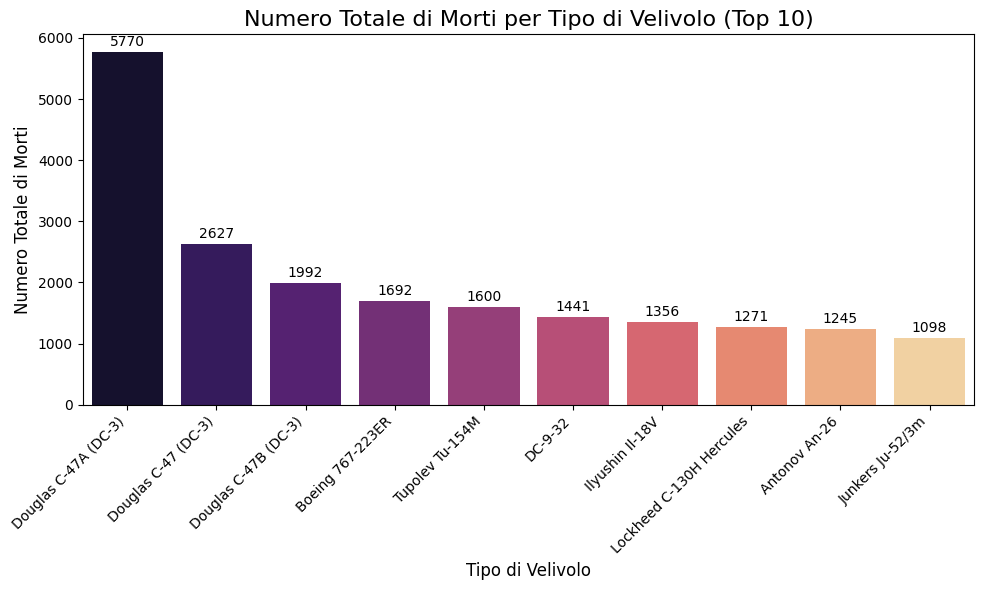

In [ ]:
import matplotlib.pyplot as plt
# Raggruppa per tipo di velivolo e somma le vittime
fatalities_by_type = df_complete.groupby('type')['fatalities'].sum().sort_values(ascending=False)

# Seleziona i primi N tipi di velivolo con più vittime
top_n_types = 10
top_fatalities_by_type = fatalities_by_type.head(top_n_types)

print(f"Top {top_n_types} tipi di velivolo con il maggior numero di vittime:")
print(top_fatalities_by_type)

# Crea il grafico a barre
plt.figure(figsize=(10, 6))
sns.barplot(x=top_fatalities_by_type.index, y=top_fatalities_by_type.values, palette='magma')

# Aggiunge titolo e etichette agli assi
plt.title(f'Numero Totale di Morti per Tipo di Velivolo (Top {top_n_types})', fontsize=16)
plt.xlabel('Tipo di Velivolo', fontsize=12)
plt.ylabel('Numero Totale di Morti', fontsize=12)

# Ruota le etichette dell'asse x per evitare sovrapposizioni
plt.xticks(rotation=45, ha='right')

# Aggiunge i valori sopra le barre per maggiore chiarezza
for i, count in enumerate(top_fatalities_by_type.values):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

# Assicurati che il layout sia pulito e che le etichette non si sovrappongano
plt.tight_layout()

# Mostra il grafico
plt.show()


Top 10 tipi di velivolo con il maggior numero di vittime:
type
Douglas C-47A (DC-3)        5770
Douglas C-47 (DC-3)         2627
Douglas C-47B (DC-3)        1992
Boeing 767-223ER            1692
Tupolev Tu-154M             1600
DC-9-32                     1441
Ilyushin Il-18V             1356
Lockheed C-130H Hercules    1271
Antonov An-26               1245
Junkers Ju-52/3m            1098
Name: fatalities, dtype: int64


<ipython-input-85-20535b3cc5b5>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




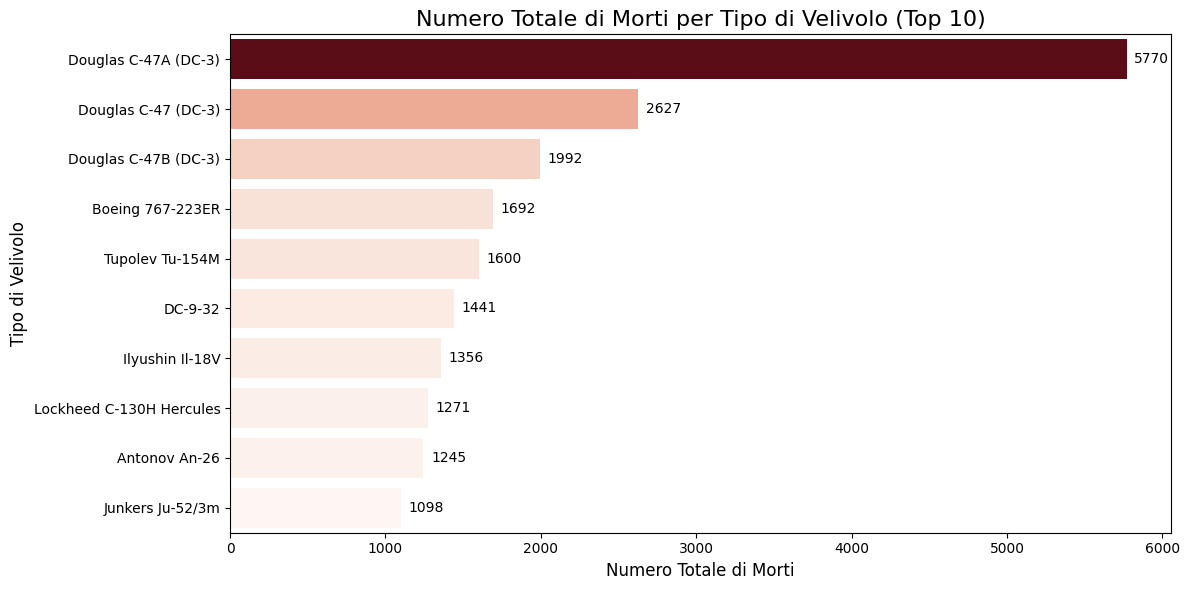

In [ ]:
import matplotlib.pyplot as plt
# Quale tipo di velivolo ha causato più morti? (Grafico a barre orizzontali)

# Raggruppa per tipo di velivolo e somma le vittime
fatalities_by_type = df_complete.groupby('type')['fatalities'].sum().sort_values(ascending=False)

# Seleziona i primi N tipi di velivolo con più vittime
top_n_types = 10
top_fatalities_by_type = fatalities_by_type.head(top_n_types)

print(f"Top {top_n_types} tipi di velivolo con il maggior numero di vittime:")
print(top_fatalities_by_type)

# Crea una palette di rossi che va da chiaro a scuro
cmap = plt.get_cmap('Reds')
# Normalizza i valori per mappare i colori
norm = plt.Normalize(vmin=top_fatalities_by_type.min(), vmax=top_fatalities_by_type.max())
# Crea una lista di colori basata sulla mappatura normalizzata
colors = [cmap(norm(value)) for value in top_fatalities_by_type.values]

# Crea il grafico a barre orizzontali
plt.figure(figsize=(12, 6)) # Regola le dimensioni del grafico
sns.barplot(x=top_fatalities_by_type.values, y=top_fatalities_by_type.index, palette=colors, orient='h')

# Aggiungi titolo e etichette agli assi
plt.title(f'Numero Totale di Morti per Tipo di Velivolo (Top {top_n_types})', fontsize=16)
plt.xlabel('Numero Totale di Morti', fontsize=12)
plt.ylabel('Tipo di Velivolo', fontsize=12)

# Aggiungi i valori vicino alle barre per maggiore chiarezza
for i, count in enumerate(top_fatalities_by_type.values):
    plt.text(count + 50, i, str(count), ha='left', va='center') # Aggiungi un offset per posizionare il testo

# Assicurati che il layout sia pulito
plt.tight_layout()

# Mostra il grafico
plt.show()

Come si sono evoluti gli incidenti dopo l'11 Settembre 2001?

Incidenti e vittime per anno dopo l'11 Settembre 2001:
    year  numero_incidenti  totale_vittime
0   2001                77            3532
1   2002               220            1302
2   2003               215            1130
3   2004               206             677
4   2005               215            1352
5   2006               219            1198
6   2007               216             911
7   2008               216             787
8   2009               201            1017
9   2010               187            1043
10  2011               190             713
11  2012               174             689
12  2013               205             355
13  2014               221            1220
14  2015               218             836
15  2016               201             564
16  2017               193             314
17  2018               226             962
18  2019               237             471
19  2020               200             430
20  2021               179             325

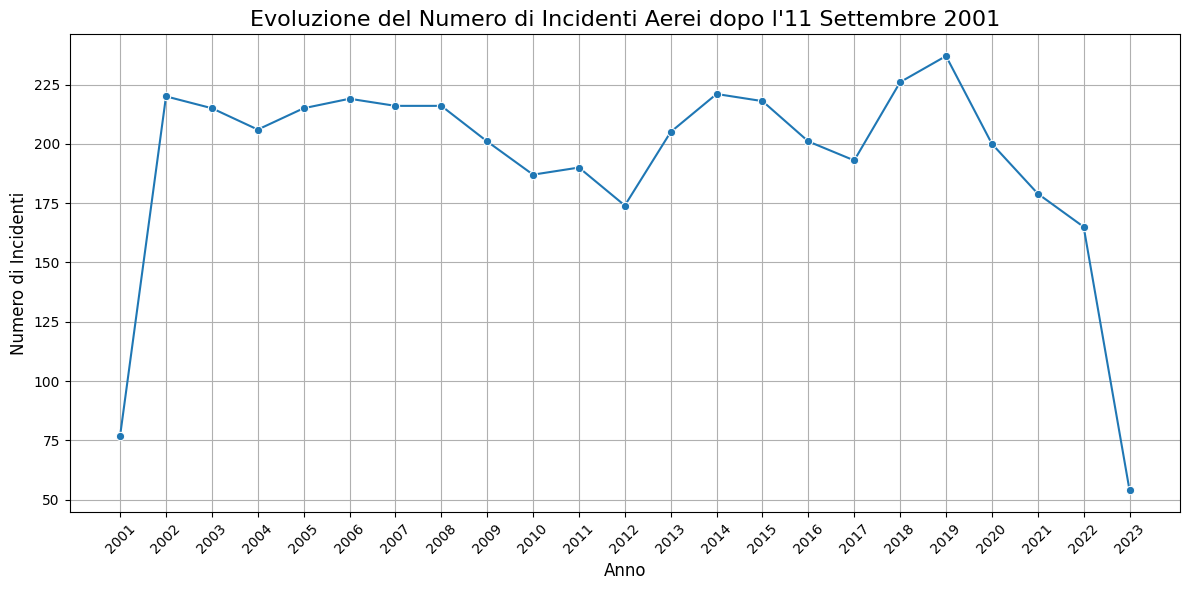

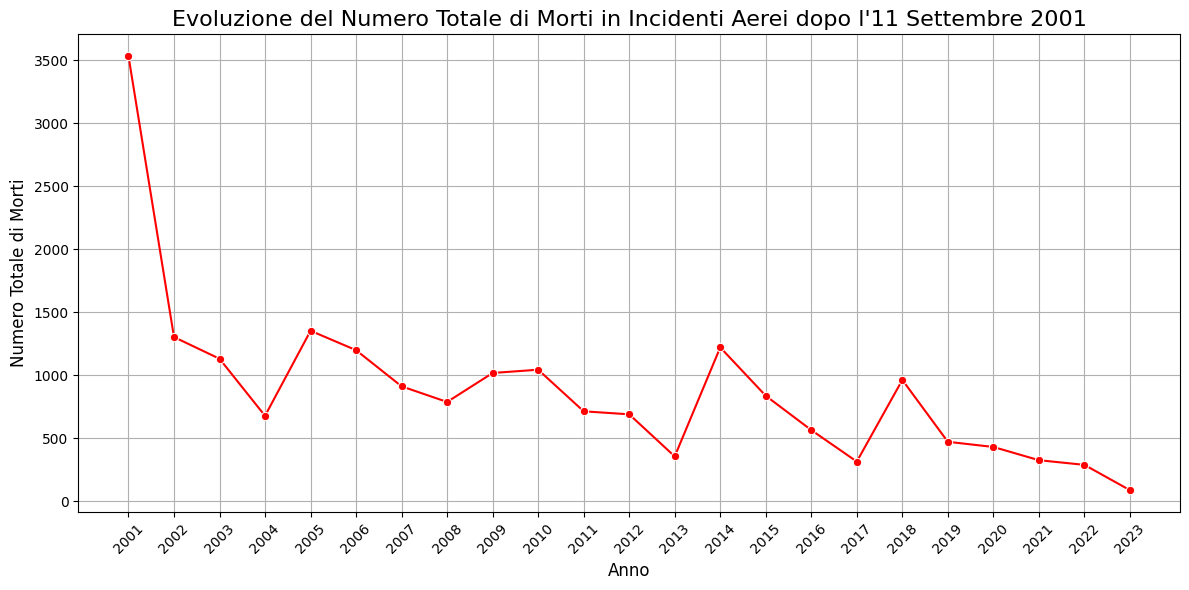

In [ ]:
#  Come si sono evoluti gli incidenti dopo l'11 Settembre 2001?

import pandas as pd
import matplotlib.pyplot as plt
# Filtra i dati per gli incidenti avvenuti dopo l'11 Settembre 2001
data_11_settembre_2001 = pd.to_datetime('2001-09-11')
df_after_911 = df_complete[df_complete['date'] >= data_11_settembre_2001].copy()

# Estrai l'anno per raggruppare
df_after_911['year'] = df_after_911['date'].dt.year

# Raggruppa per anno e conta il numero di incidenti e somma le vittime
incidenti_per_anno_dopo_911 = df_after_911.groupby('year').agg(
    numero_incidenti=('date', 'count'),
    totale_vittime=('fatalities', 'sum')
).reset_index()

print("Incidenti e vittime per anno dopo l'11 Settembre 2001:")
print(incidenti_per_anno_dopo_911)

# Crea un grafico per mostrare l'evoluzione del numero di incidenti per anno dopo l'11 Settembre 2001
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='numero_incidenti', data=incidenti_per_anno_dopo_911, marker='o')
plt.title("Evoluzione del Numero di Incidenti Aerei dopo l'11 Settembre 2001", fontsize=16)
plt.xlabel("Anno", fontsize=12)
plt.ylabel("Numero di Incidenti", fontsize=12)
plt.xticks(incidenti_per_anno_dopo_911['year'].unique(), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Crea un grafico per mostrare l'evoluzione del numero totale di vittime per anno dopo l'11 Settembre 2001
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='totale_vittime', data=incidenti_per_anno_dopo_911, marker='o', color='red')
plt.title("Evoluzione del Numero Totale di Morti in Incidenti Aerei dopo l'11 Settembre 2001", fontsize=16)
plt.xlabel("Anno", fontsize=12)
plt.ylabel("Numero Totale di Morti", fontsize=12)
plt.xticks(incidenti_per_anno_dopo_911['year'].unique(), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Quali sono gli operatori più sicuri?**

Per determinare quali siano gli operatori aerei più "sicuri", possiamo usare un criterio oggettivo basato sui dati: ad esempio, quali operatori hanno avuto il minor numero di incidenti oppure quali operatori hanno avuto incidenti ma senza vittime.
Vediamo più modi per calcolarla:

In [ ]:
# Top 10 operatori con meno incidenti (che hanno almeno 1 incidente registrato)
incidenti_per_operatore = df_complete['operator'].value_counts(ascending=True)
print("Operatori con meno incidenti registrati:")
print(incidenti_per_operatore.head(10))

Operatori con meno incidenti registrati:
operator
Broome Aviation                                 1
Vesey Air                                       1
Churchill Aviation                              1
Saha Air, lsf Iran AF                           1
Tradexim SRL                                    1
RG Aviation, op.for Laredo Air                  1
Lebap Aircompany                                1
Aquiline International, op.for Manunggal Air    1
Kolavia, op.for Taban Air                       1
Aero Pulse, opf UN WFP                          1
Name: count, dtype: int64


In [ ]:
# il totale di vittime per ciascun operatore
vittime_per_operatore = df_complete.groupby("operator")["fatalities"].sum().sort_values()
print("Operatori con il minor numero di vittime totali:")
print(vittime_per_operatore.head(10))

Operatori con il minor numero di vittime totali:
operator
easyJet                            0
ÃLAG                              0
, op.for UN                        0
09 Charlie                         0
ACS                                0
ACS Skydiving Center               0
ACSA - Air Century                 0
ACT Airlines                       0
ACT Airlines, opf Saudi Arabian    0
ADAT                               0
Name: fatalities, dtype: int64


In [ ]:
# Filtra solo gli incidenti con 0 vittime
incidenti_senza_vittime = df_complete[df_complete["fatalities"] == 0]

# Conta quanti incidenti non fatali per ogni operatore
operatori_sicuri = incidenti_senza_vittime["operator"].value_counts()

print("Operatori con incidenti ma nessuna vittima:")
print(operatori_sicuri.head(10))

Operatori con incidenti ma nessuna vittima:
operator
USAAF                1543
RAF                   554
USAF                  442
US Navy               361
German AF             256
private               209
Aeroflot              111
American Airlines      84
Eastern Air Lines      77
RAAF                   75
Name: count, dtype: int64


Per determinare gli operatori più sicuri dobbiamo considerare sia gli incidenti che i decessi, perché un operatore con molti incidenti ma pochi decessi potrebbe essere più sicuro di uno con pochi incidenti ma un elevato numero di decessi per incidente.

Alcuni incidenti non comportano decessi, quindi gli operatori più sicuri sono quelli il cui numero medio di decessi per incidente è pari a 0.

In [ ]:
def avg_fatalities_per_accident_per_operators(df):

    # ✅ Step 1
    operator_accidents = df.groupby('operator').size()

    # ✅ Step 2
    operator_fatalities = df.groupby('operator')['fatalities'].sum()

    # ✅ Step 3
    operator_fatalities = operator_fatalities.reindex(operator_accidents.index).fillna(0)

    # ✅ Step 4
    avg_fatalities_per_accident = (operator_fatalities / operator_accidents)

    # ✅ Step 5
    avg_fatalities_per_accident_per_operator = avg_fatalities_per_accident.sort_values()

    return avg_fatalities_per_accident_per_operator


all_operators = avg_fatalities_per_accident_per_operators(df)


all_operators

,0
operator,
"European Union, lsf AirTraffic Africa",0.0
Pineapple Air,0.0
Pinders,0.0
Pilot Point Consultancy,0.0
Piedmont Hawthorne,0.0
...,...
"Birgenair, op.for Alas Nacionales",189.0
Lauda Air,223.0
Metrojet,224.0


In [ ]:
operators_with_zero_fatalities = all_operators[all_operators == 0]
operators_with_zero_fatalities.shape

(3093,)

Ci sono 3093 operatori che hanno avuto almeno 1 incidente, ma nessuno ha causato vittime, quindi potremmo considerarli gli operatori più sicuri.

Avremmo potuto rispondere alla domanda indicando agli operatori il numero minimo di incidenti, ma ricorda che potrebbero esserci operatori che non hanno avuto incidenti (al di fuori del set di dati).

**Analisi Temporali**

Numero di incidenti per anno:
year
1919    2
1920    4
1921    7
1922    3
1923    7
Name: count, dtype: int64
...
year
2019    237
2020    200
2021    179
2022    165
2023     54
Name: count, dtype: int64

Anno/i con il maggior numero di incidenti:
year
1944    1364
Name: count, dtype: int64


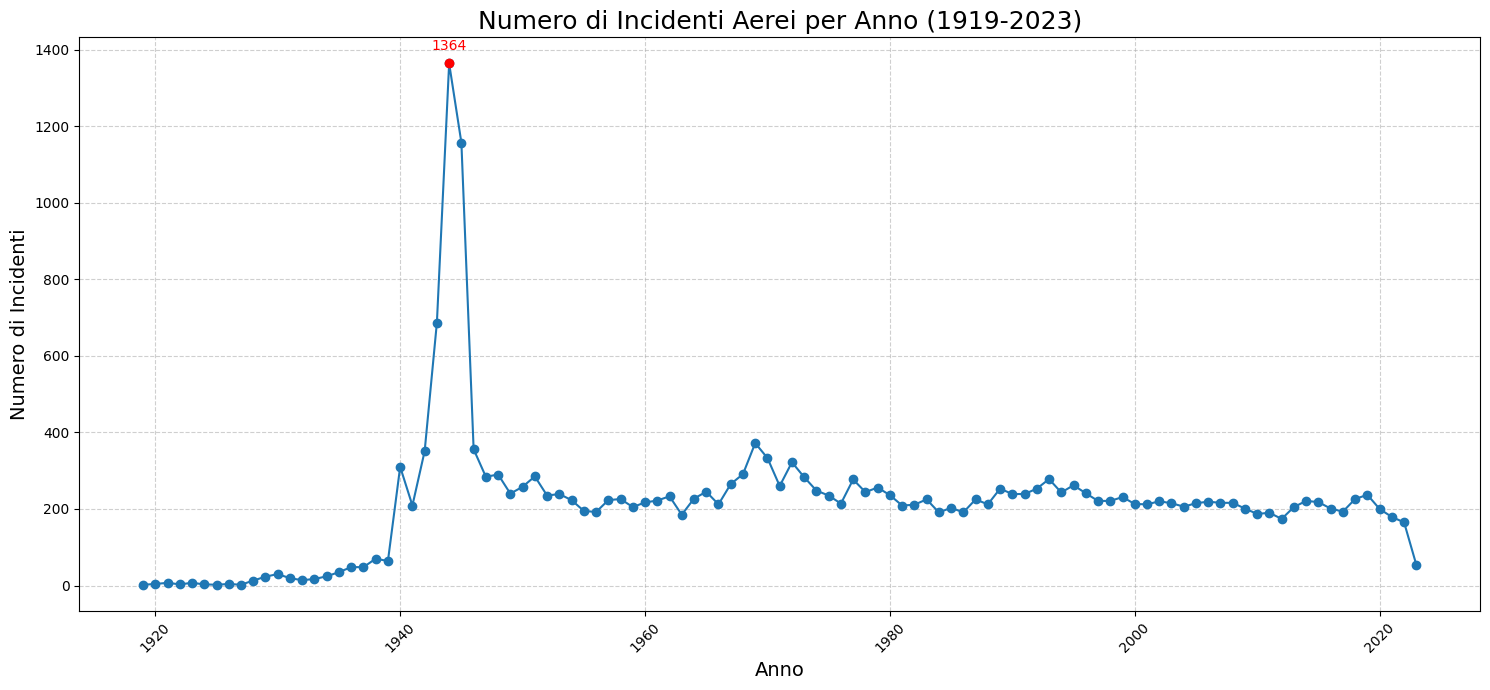

In [ ]:
# anni con più incidenti

import pandas as pd
import matplotlib.pyplot as plt
# Assicurati che la colonna 'year' sia di tipo numerico intero
df_complete['year'] = pd.to_numeric(df_complete['year'])

# Raggruppa per anno e conta il numero di incidenti
incidenti_per_anno = df_complete['year'].value_counts().sort_index()

print("Numero di incidenti per anno:")
print(incidenti_per_anno.head()) # Mostra i primi anni
print("...")
print(incidenti_per_anno.tail()) # Mostra gli ultimi anni

# Identifica l'anno o gli anni con il maggior numero di incidenti
anni_con_piu_incidenti = incidenti_per_anno[incidenti_per_anno == incidenti_per_anno.max()]

print("\nAnno/i con il maggior numero di incidenti:")
print(anni_con_piu_incidenti)

# Crea un grafico a linee per visualizzare l'andamento degli incidenti nel tempo
plt.figure(figsize=(15, 7))
incidenti_per_anno.plot(kind='line', marker='o')

# Aggiungi titolo e etichette agli assi
plt.title('Numero di Incidenti Aerei per Anno (1919-2023)', fontsize=18)
plt.xlabel('Anno', fontsize=14)
plt.ylabel('Numero di Incidenti', fontsize=14)

# Aggiungi una griglia per facilitare la lettura
plt.grid(True, linestyle='--', alpha=0.6)

# Migliora la leggibilità delle etichette sull'asse X se ci sono molti anni
plt.xticks(rotation=45)

# Evidenzia l'anno o gli anni con il picco di incidenti (opzionale)
for year, count in anni_con_piu_incidenti.items():
    plt.annotate(f'{count}', (year, count), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='red')
    plt.plot(year, count, 'ro') # Aggiungi un punto rosso

# Assicurati che il layout sia pulito
plt.tight_layout()

# Mostra il grafico
plt.show()


Numero di vittime per anno:
year
1919    15
1920     4
1921     2
1922    19
1923    11
Name: fatalities, dtype: int64
...
year
2019    471
2020    430
2021    325
2022    288
2023     87
Name: fatalities, dtype: int64

Anno/i con il maggior numero di vittime:
year
2001    4007
Name: fatalities, dtype: int64


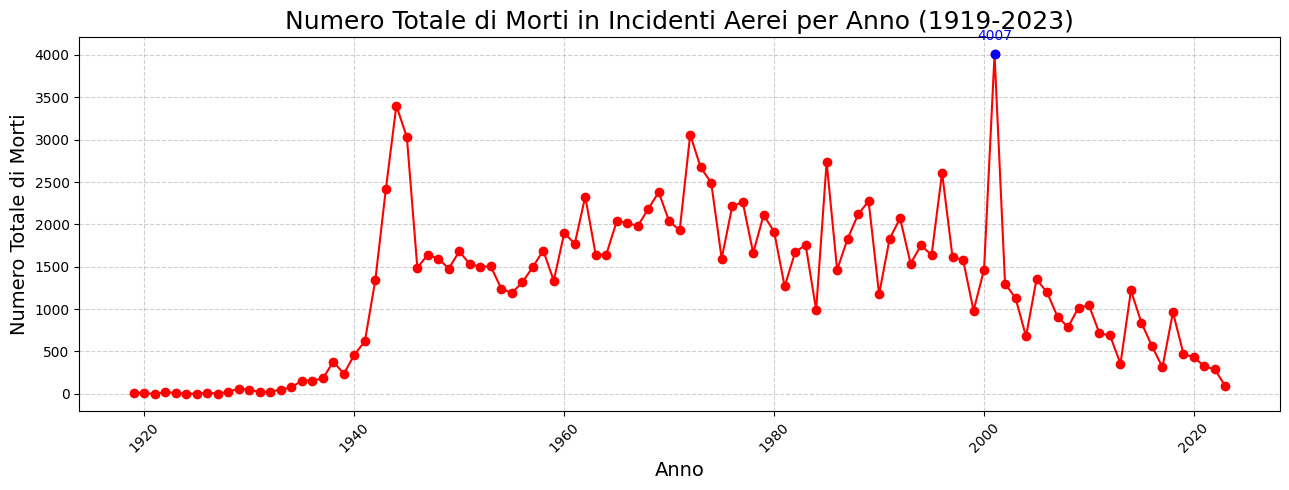

In [ ]:
# Numero di incidenti per anno

import matplotlib.pyplot as plt
# Calcola la somma delle vittime per anno
vittime_per_anno = df_complete.groupby('year')['fatalities'].sum()

print("\nNumero di vittime per anno:")
print(vittime_per_anno.head()) # Mostra i primi anni
print("...")
print(vittime_per_anno.tail()) # Mostra gli ultimi anni

# Identifica l'anno o gli anni con il maggior numero di vittime
anni_con_piu_vittime = vittime_per_anno[vittime_per_anno == vittime_per_anno.max()]

print("\nAnno/i con il maggior numero di vittime:")
print(anni_con_piu_vittime)

# Crea un grafico a linee per visualizzare l'andamento delle vittime nel tempo
plt.figure(figsize=(13, 5))
vittime_per_anno.plot(kind='line', marker='o', color='red') # Usa plot() direttamente sulla Series

# Aggiungi titolo e etichette agli assi
plt.title('Numero Totale di Morti in Incidenti Aerei per Anno (1919-2023)', fontsize=18)
plt.xlabel('Anno', fontsize=14)
plt.ylabel('Numero Totale di Morti', fontsize=14)

# Aggiungi una griglia per facilitare la lettura
plt.grid(True, linestyle='--', alpha=0.6)

# Migliora la leggibilità delle etichette sull'asse X se ci sono molti anni
plt.xticks(rotation=45)

# Evidenzia l'anno o gli anni con il picco di vittime (opzionale)
for year, count in anni_con_piu_vittime.items():
    plt.annotate(f'{count}', (year, count), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='blue')
    plt.plot(year, count, 'bo') # Aggiungi un punto blu

# Assicurati che il layout sia pulito
plt.tight_layout()

# Mostra il grafico
plt.show()

Dai grafici appena mostrati emerge quanto segue:

Entrambi i grafici registrano un picco di incidenti e vittime durante la Seconda Guerra Mondiale;

Nel 2001 abbiamo un numero ancora più alto di vittime, ma non di incidenti (dovuti agli attacchi dell'11 Settembre gli incidenti aerei sono stati tre);

A parte un picco di minore intensità tra gli anni Sessanta e Settanta, il numero di incidenti è stato piuttosto stabile nel tempo, registrando una diminuzione dopo il 2019 (probabilmente dovuto alla pandemia da Covid-19);

Il picco di moderata intensità descritto in precedenza è emerso anche nel grafico relativo al numero di vittime, che ha in seguito registrato un calo medio dei casi di morte (dovuto probabilmente al progresso tecnologico in aeronautica e all'aumento di leggi sulla sicurezza aerea).


# Informazioni sugli operatori

<ipython-input-94-fffa0a2dd522>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




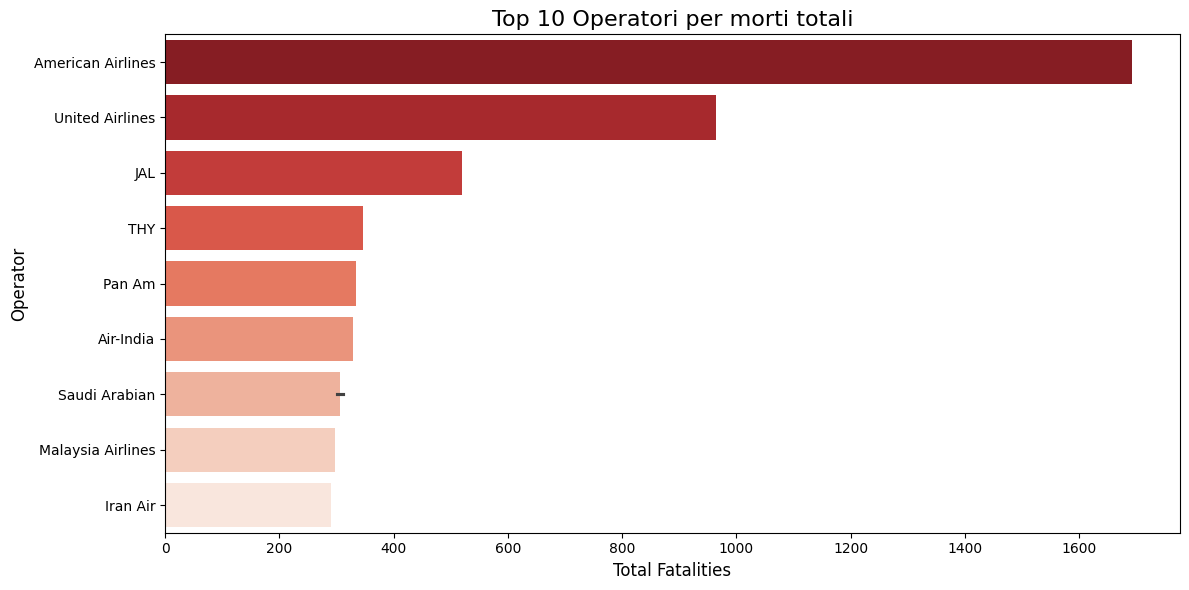


Top 10 operators with the highest total fatalities:
operator
USAF                 5905
USAAF                4494
American Airlines    3164
US Navy              2823
RAF                  2632
United Airlines      2071
Air France           1676
Pan Am               1663
Soviet AF            1271
German AF            1228
Name: fatalities, dtype: int64


<ipython-input-94-fffa0a2dd522>:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




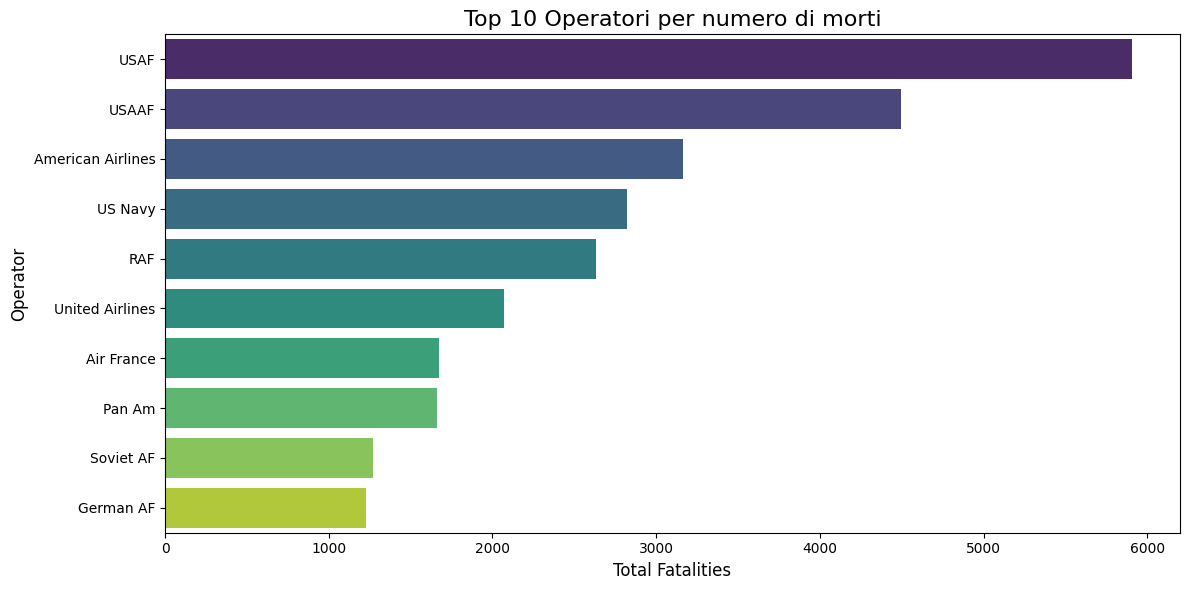

In [ ]:
# fatalities per operator

import matplotlib.pyplot as plt
# Sort the DataFrame by fatalities in descending order
df_complete_sorted_fatalities = df_complete.sort_values(by='fatalities', ascending=False)

# Get the top 10 operators by total fatalities
top_10_operators_fatalities = df_complete_sorted_fatalities.head(10)



# Create a bar plot for the top 10 operators by fatalities
plt.figure(figsize=(12, 6))
sns.barplot(x='fatalities', y='operator', data=top_10_operators_fatalities, palette='Reds_r')
plt.title('Top 10 Operatori per morti totali', fontsize=16)
plt.xlabel('Total Fatalities', fontsize=12)
plt.ylabel('Operator', fontsize=12)
plt.tight_layout()
plt.show()

# Group by operator and sum fatalities to get total fatalities per operator
fatalities_per_operator = df_complete.groupby('operator')['fatalities'].sum().sort_values(ascending=False)

# Select the top N operators with the highest total fatalities
top_n_operators = 10
top_fatalities_per_operator = fatalities_per_operator.head(top_n_operators)

print(f"\nTop {top_n_operators} operators with the highest total fatalities:")
print(top_fatalities_per_operator)

# Create a bar plot for the top operators by total fatalities
plt.figure(figsize=(12, 6))
sns.barplot(x=top_fatalities_per_operator.values, y=top_fatalities_per_operator.index, palette='viridis', orient='h')
plt.title(f'Top {top_n_operators} Operatori per numero di morti', fontsize=16)
plt.xlabel('Total Fatalities', fontsize=12)
plt.ylabel('Operator', fontsize=12)
plt.tight_layout()
plt.show()

Dai grafici appena riportati, possiamo osservare quanto segue:

Il primato per numero di incidenti e vittime appartiene al United States Army Air Forces (USAAF) e al United States Air Force (USAF), che rappresentano entrambe la forza militare aerea degli Stati Uniti;

I primi cinque operatori per numero di incidenti riguardano forze aeree militari di Stati Uniti, Inghilterra e Germania. Se uniamo questa informazione al picco di incidenti registrato tra il 1939 e il 1945, possiamo ipotizzare che la Seconda Guerra Mondiale abbia influenzato questo primato;
  
Dei primi dieci operatori per numero di vittime, sei sono di bandiera statunitense. Questo dato è influenzato sia dallo sforzo bellico nella Seconda Guerra Mondiale (USAF, USAAF, US Navy) che dagli attacchi dell'11 Settembre (American Airlines, United Airlines).


# Bonus

 **Cartogramma che rappresenti il numero di incidenti per nazione**

In [ ]:
import plotly.express as px

# Lista ufficiale dei paesi riconosciuti da Plotly (basata su gapminder)
plotly_countries = set(px.data.gapminder()['country'].unique())

# Estrai i nomi unici presenti nel tuo dataset
dataset_countries = set(df_complete['country'].dropna().unique())

# Trova i paesi che non corrispondono ai nomi ufficiali
unrecognized_countries = sorted(dataset_countries - plotly_countries)

print("⚠️ Paesi non riconosciuti da Plotly:")
for country in unrecognized_countries:
    print(f" - {country}")


⚠️ Paesi non riconosciuti da Plotly:
 - American Samoa
 - Anguilla
 - Antarctica
 - Antigua
 - Arctic Ocean
 - Armenia
 - Aruba
 - Atlantic Ocean
 - Azerbaijan
 - B.V.I.
 - Bahamas
 - Barbados
 - Belarus
 - Belize
 - Bermuda
 - Bhutan
 - Bosnia
 - C.A.R.
 - Cape Verde
 - Caribbean Neth'lands
 - Cayman Isl.
 - Christmas Isl.
 - Cocos Isl.
 - Congo
 - Cook Isl.
 - CuraÃ§ao
 - Cyprus
 - Czech Rep.
 - D.R. Congo
 - Dominica
 - Dominican Rep.
 - Eq. Guinea
 - Estonia
 - Eswatini
 - Falkland Isl.
 - Fiji
 - French Guiana
 - French Polynesia
 - Georgia
 - Gibraltar
 - Greenland
 - Guadeloupe
 - Guam
 - Guyana
 - Hong Kong
 - Indian Ocean
 - Kazakhstan
 - Kiribati
 - Kosovo
 - Kyrgyzstan
 - Laos
 - Latvia
 - Lithuania
 - Luxembourg
 - Macau
 - Maldives
 - Malta
 - Marshall Isl.
 - Martinique
 - Mediterranean Sea
 - Micronesia
 - Moldova
 - Monaco
 - Montserrat
 - New Caledonia
 - Norfolk Island
 - North Korea
 - North Macedonia
 - Northern Mariana Isl
 - P.N. Guinea
 - Pacific Ocean
 - Palau
 

In [ ]:
import pandas as pd


# Dizionario completo con correzioni per i paesi non riconosciuti da Plotly
country_mapping = {
    "USA": "United States",
    "U.K.": "United Kingdom",
    "Russia": "Russian Federation",
    "Czech Rep.": "Czech Republic",
    "North Korea": "North Korea",
    "South Korea": "South Korea",
    "D.R. Congo": "Democratic Republic of the Congo",
    "C.A.R.": "Central African Republic",
    "Eq. Guinea": "Equatorial Guinea",
    "Cape Verde": "Cabo Verde",
    "St. Kitts & Nevis": "Saint Kitts and Nevis",
    "St. Vincent": "Saint Vincent and the Grenadines",
    "Saint Lucia": "Saint Lucia",
    "Timor": "Timor-Leste",
    "U.A.E.": "United Arab Emirates",
    "Dominican Rep.": "Dominican Republic",
    "Bahamas": "Bahamas",
    "Micronesia": "Micronesia, Federated States of",
    "St. Helena": "Saint Helena",
    "North Macedonia": "North Macedonia",
    "Sao Tome": "Sao Tome and Principe",
    "Laos": "Lao People's Democratic Republic",
    "Vatican": "Vatican City",
    "Antigua": "Antigua and Barbuda",
    "Barbados": "Barbados",
    "Belarus": "Belarus",
    "Kazakhstan": "Kazakhstan",
    "Qatar": "Qatar",
    "Yemen": "Yemen",
    "Turkmenistan": "Turkmenistan",
    "Tajikistan": "Tajikistan",
    "Uzbekistan": "Uzbekistan",
    "Ukraine": "Ukraine",
    "Moldova": "Moldova",
    "Armenia": "Armenia",
    "Azerbaijan": "Azerbaijan",
    "Estonia": "Estonia",
    "Georgia": "Georgia",
    "Lithuania": "Lithuania",
    "Latvia": "Latvia",
    "Luxembourg": "Luxembourg",
    "Cyprus": "Cyprus",
    "Slovakia": "Slovakia",
    "Malta": "Malta",
    "Monaco": "Monaco",
    "Bhutan": "Bhutan",
    "Guyana": "Guyana",
    "Fiji": "Fiji",
    "Suriname": "Suriname",
    "Belize": "Belize",
    "Marshall Isl.": "Marshall Islands",
    "Solomon Isl.": "Solomon Islands",
    "Tuvalu": "Tuvalu",
    "Tonga": "Tonga",
    "Kiribati": "Kiribati",
    "Vanuatu": "Vanuatu",
    "Trinidad & Tobago": "Trinidad and Tobago",
    "Grenada": "Grenada",
    "Dominica": "Dominica",
    "Seychelles": "Seychelles",
    "Maldives": "Maldives",
    "Palau": "Palau",
    "Bosnia": "Bosnia and Herzegovina",
}

# Rimuoviamo entità non geopolitiche o territori dipendenti
non_countries = [
    "American Samoa", "Anguilla", "Antarctica", "Arctic Ocean", "Aruba",
    "Atlantic Ocean", "B.V.I.", "Bermuda", "Caribbean Neth'lands", "Cayman Isl.",
    "Christmas Isl.", "Cocos Isl.", "Congo", "Cook Isl.", "CuraÃ§ao", "French Guiana",
    "French Polynesia", "Gibraltar", "Greenland", "Guadeloupe", "Guam", "Hong Kong",
    "Indian Ocean", "Kosovo", "Macau", "Martinique", "Mediterranean Sea", "Montserrat",
    "New Caledonia", "Norfolk Island", "Northern Mariana Isl", "P.N. Guinea", "Pacific Ocean",
    "Saint BarthÃ©lemy", "Sint Maarten", "St.Pierre & Miquelon", "Turks & Caicos",
    "U.S. M.O. Islands", "U.S. Virgin Isl."
]

# Applica il mapping
df_complete['country'] = df_complete['country'].replace(country_mapping)

# Rimuove i non-paesi
df_complete = df_complete[~df_complete['country'].isin(non_countries)]

# Calcola i conteggi aggiornati per nazione
country_accident_counts = df_complete['country'].value_counts().reset_index()
country_accident_counts.columns = ['country', 'num_incidents']

country_accident_counts.head()


,country,num_incidents
0,United States,4338
1,Russian Federation,1358
2,United Kingdom,834
3,Canada,820
4,India,693


In [ ]:
import plotly.express as px

# Calcola il numero di incidenti per nazione
country_accident_counts = df_complete['country'].value_counts().reset_index()
country_accident_counts.columns = ['country', 'num_incidents']

# Crea la mappa
fig = px.choropleth(
    country_accident_counts,
    locations="country",
    locationmode='country names',
    color="num_incidents",
    hover_name="country",
    hover_data={"num_incidents": True},
    color_continuous_scale="Viridis",
    title='Numero di Incidenti Aerei per Nazione (1919–2023)'
)

# Personalizza il layout della mappa
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    margin={"r":0,"t":50,"l":0,"b":0}
)

# Visualizza la mappa
fig.show()


**Analisi delle categorie di incidenti (cat)**

Numero di incidenti per categoria:
cat
A1    15646
A2     2405
C1     1050
H2      980
O1      882
U1      227
C2       82
O2       63
H1       42
I2       12
I1        3
Name: count, dtype: int64

Top 10 categorie di incidenti più frequenti:
cat
A1    15646
A2     2405
C1     1050
H2      980
O1      882
U1      227
C2       82
O2       63
H1       42
I2       12
Name: count, dtype: int64


<ipython-input-98-17a829e79256>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




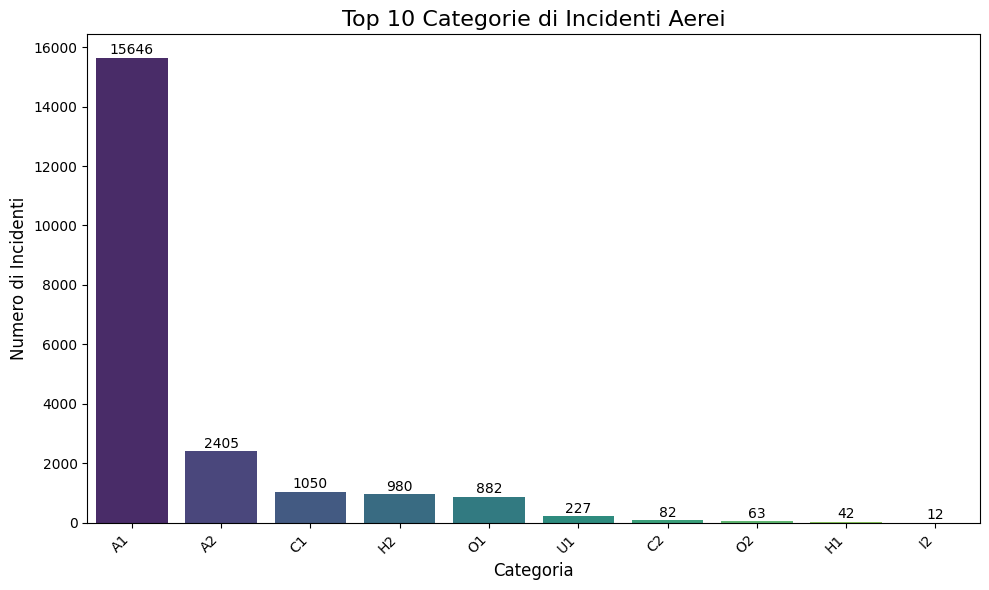


Numero totale di vittime per categoria di incidente:
cat
A1    111969
C1      7398
H1      3592
H2       171
A2       145
O1        74
C2        53
O2         2
I1         0
I2         0
Name: fatalities, dtype: int64


<ipython-input-98-17a829e79256>:49: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




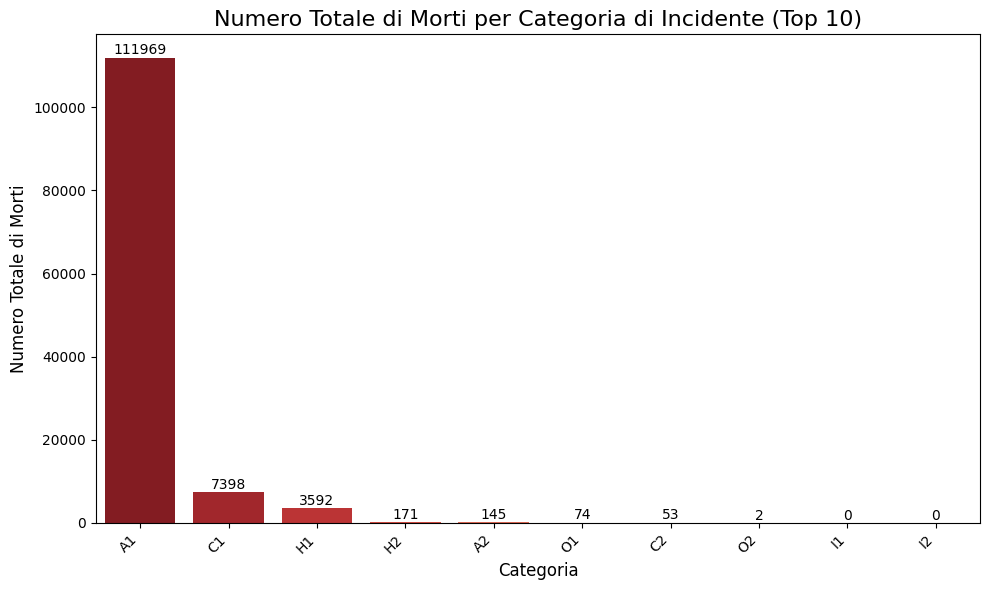

In [ ]:
# prompt: maggiori caterigorie degli incidenti

import matplotlib.pyplot as plt
# Analisi delle categorie di incidenti (cat)

# Contiamo la frequenza di ciascuna categoria di incidente
cat_counts = df_complete['cat'].value_counts()

print("Numero di incidenti per categoria:")
print(cat_counts)

# Selezioniamo le prime N categorie più frequenti
top_n_cat = 10
top_cats = cat_counts.head(top_n_cat)

print(f"\nTop {top_n_cat} categorie di incidenti più frequenti:")
print(top_cats)

# Crea un grafico a barre per visualizzare le categorie più frequenti
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cats.index, y=top_cats.values, palette='viridis')

# Aggiungi titolo e etichette agli assi
plt.title(f'Top {top_n_cat} Categorie di Incidenti Aerei', fontsize=16)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Numero di Incidenti', fontsize=12)

# Ruota le etichette dell'asse x per evitare sovrapposizioni
plt.xticks(rotation=45, ha='right')

# Aggiungere i valori sopra le barre per maggiore chiarezza
for i, count in enumerate(top_cats.values):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

# layout sia pulito
plt.tight_layout()

# Mostra il grafico
plt.show()

# Possiamo anche esplorare la distribuzione delle vittime per categoria
fatalities_by_cat = df_complete.groupby('cat')['fatalities'].sum().sort_values(ascending=False)

print("\nNumero totale di vittime per categoria di incidente:")
print(fatalities_by_cat.head(top_n_cat))

# Crea un grafico a barre per visualizzare le vittime per categoria
plt.figure(figsize=(10, 6))
sns.barplot(x=fatalities_by_cat.head(top_n_cat).index, y=fatalities_by_cat.head(top_n_cat).values, palette='Reds_r')
plt.title(f'Numero Totale di Morti per Categoria di Incidente (Top {top_n_cat})', fontsize=16)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Numero Totale di Morti', fontsize=12)
plt.xticks(rotation=45, ha='right')
for i, count in enumerate(fatalities_by_cat.head(top_n_cat).values):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')
plt.tight_layout()
plt.show()